In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#Create Neural Network
class NeuralNet(nn.Module):
    def __init__(self, p):
        super().__init__()
        self.p = p
        self.W0 = torch.tensor([[1.0], [1.0], [0.0]], dtype=torch.float32)
        self.B0 = torch.tensor([0.0, -0.5, 0.0], dtype=torch.float32)
        self.Wr = []
        self.Br = []
        for r in range(1, p):
            wr = torch.tensor([
                [2.0, -4.0, 0.0],
                [2.0, -4.0, 0.0],
                [2.0/(4 ** r), -4.0/(4**r), 1.0]
            ], dtype=torch.float32)
            br = torch.tensor([0.0, -0.5, 0.0], dtype=torch.float32)
            self.Wr.append(wr)
            self.Br.append(br)
        self.Wp = torch.tensor([[2.0 * (4 ** -p), -4.0 * (4 ** -p), 1.0]], dtype=torch.float32)
        self.Bp = torch.tensor([0.0], dtype=torch.float32)

    def forward(self, x_scalar):
        x = torch.tensor([x_scalar], dtype=torch.float32)
        x = torch.matmul(self.W0, x) + self.B0
        x = F.relu(x)
        for r in range(self.p - 1):
            x = torch.matmul(self.Wr[r], x) + self.Br[r]
            x = F.relu(x)
        out = torch.matmul(self.Wp, x) + self.Bp
        return out[0]

In [4]:
def f(x):
    return x*(1-x)
xs=[i/100 for i in range(101)]
errors = []
for p in range(2, 11):
    model = NeuralNet(p)
    max_error = 0.0
    for x in xs:
        yhat = model(x).item()
        y = f(x)
        err = abs(yhat - y)
        max_error = max(max_error, err)
    errors.append(max_error)

print("All errors:", errors)

All errors: [0.01560000387430191, 0.003900001639127723, 0.0009750268220901741, 0.0002437565565109323, 6.094644069667976e-05, 1.5265667438479902e-05, 3.827965259523003e-06, 9.700298309045507e-07, 2.5681257249596245e-07]


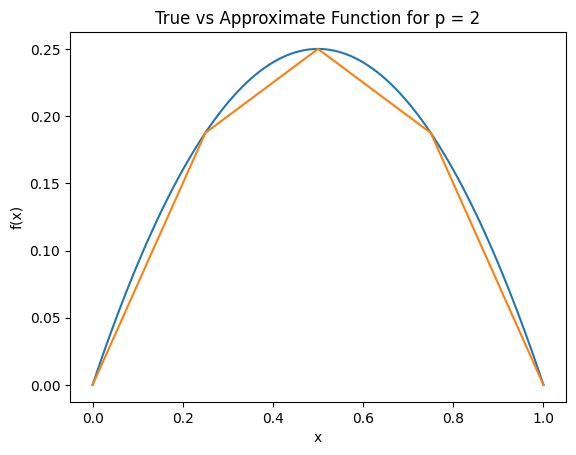

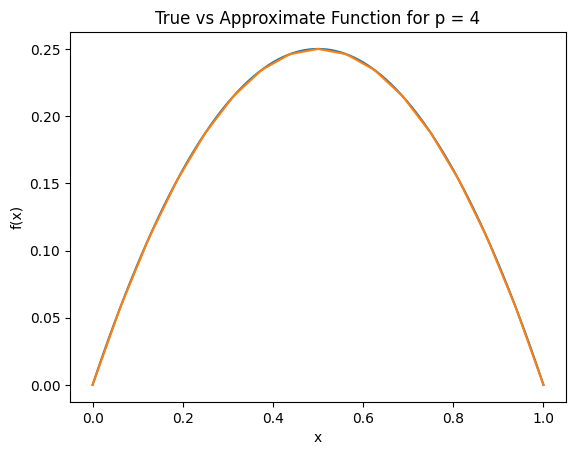

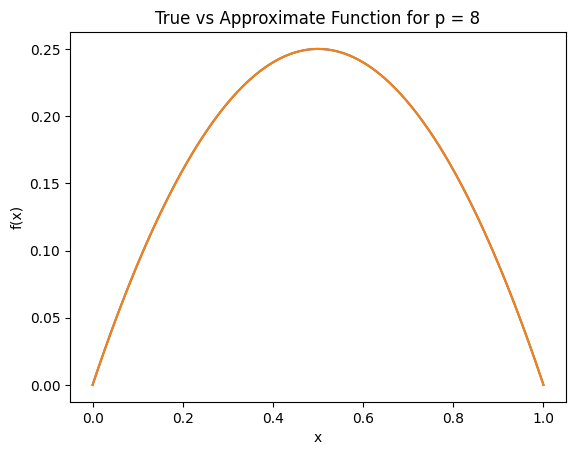

In [5]:
for p in [2, 4, 8]:
    model = NeuralNet(p)
    y = [f(x) for x in xs]
    yhat = [model(x).item() for x in xs]
    plt.plot(xs, y, label="True function f(x) = x(1 - x)")
    plt.plot(xs, yhat, label=f"Neural Network Approximation (p = {p})")
    plt.title(f"True vs Approximate Function for p = {p}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()

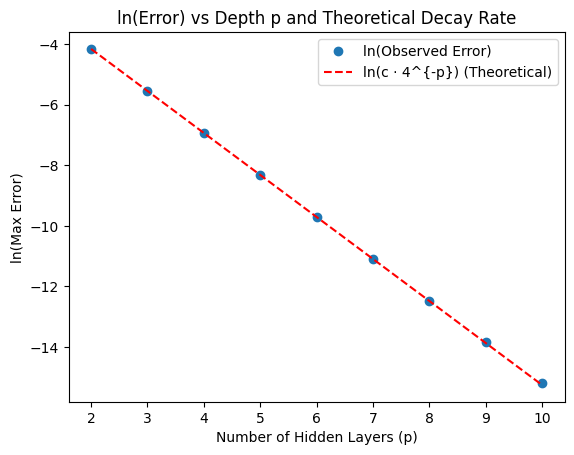

In [6]:
ps = list(range(2, 11))
log_errors = np.log(errors)
c = errors[0] * (4 ** 2)
log_errors_theoretical = [np.log(c)-p*np.log(4) for p in ps]
plt.plot(ps, log_errors, 'o', label='ln(Observed Error)')
plt.plot(ps, log_errors_theoretical, 'r--', label='ln(c · 4^{-p}) (Theoretical)')
plt.xlabel('Number of Hidden Layers (p)')
plt.ylabel('ln(Max Error)')
plt.title('ln(Error) vs Depth p and Theoretical Decay Rate')
plt.legend()
plt.show()